# 75.26 Modelos y Simulación

# Trabajo Práctico 2

## Grupo 2

### Alumnos:

- Duzac, Emilia
- Belletti, Gabriel Ignacio
- Vazquez, Nicolás Alberto
- Cohen, Martín

### Generador de números aleatorios elegido: [MIXMAX](http://arxiv.org/pdf/1403.5355)

## Ejercicio 1
Un servidor recibe solicitudes las cuales son procesadas de una por vez en el orden de llegada (política FIFO). Se determinó
que en 10 milisegundos existe una probabilidad $p = \frac{1}{40}$ que llegue una nueva solicitud y una probabilidad $q = \frac{1}{30}$ que una
solicitud termine de ser procesada y deje el sistema.
Se desea estudiar la cantidad de solicitudes en el servidor considerando tanto las que están en cola esperando ser
procesadas como la solicitud que está siendo procesada.

## Resolución
El ejercicio se puede modelar como una cadena de Markov de infinitos estados donde cada estado representa la cantidad de solicitudes en el servidor a procesar. Por lo tanto, el universo de estados posibles son el 0 y todos los números naturales. 

El estado 0 representa que el servidor no tiene ninguna solicitud a procesar y tiene dos posibles cambios de estado: 
- Permanecer en el estado 0 que sería el caso que no llegue ninguna solicitud en el intervalo de tiempo de 10ms o que llegue una solicitud y se complete en dicho intervalo. 
- Pasar al estado 1 que sería el caso que llegue una nueva solicitud y no se complete en el intervalo de tiempo de 10ms.

Desde el estado 1 en adelante, es decir, todos los estados en los cuales al menos hay una solicitud en la cola para procesar tienen los siguientes cambios de estado:
- Pasar al estado numéricamente inferior que sería el caso que en el intervalo de tiempo de 10ms no llegue ninguna solicitud nueva y se complete una. 
- Permanecer en el estado actual que se daría cuando no llegue ninguna solicitud nueva ni se complete ninguna o que llegue una nueva solicitud y se complete una. 
- Pasar al estado numéricamente superior que sería el caso que llegue una nueva solicitud y no se complete ninguna. 


**a) Determinar la matriz de transición de estados explicando cómo se obtiene la misma.**

Para obtener la matriz de transición de estados tenemos que calcular las probabilidades asociadas a cada uno de los cambios de estado explicados anteriormente.

En el caso del estado 0, las probabilidades para cada uno de sus 2 posibles cambios de estado son:
- Permanecer en el estado 0: En este caso, se tienen los dos posibles eventos mencionados y la probabilidad de que esto ocurra es la suma de las probabilidades de cada evento por ser éstos mutuamente excluyentes, es decir, en este caso sería $\frac{39}{40} + \frac{1}{40} * \frac{1}{30} = 0.975$
- Pasar al estado 1: En este caso, hay un solo evento posible y la probabilidad asociada a este evento sería $\frac{1}{40} * \frac{29}{30} = 0.025$

Para el resto de los estados se tienen 3 posibles cambios de estado y las probabilidades para cada uno son:
- Pasar al estado numéricamente inferior: En este caso, hay un solo evento posible y la probabilidad asociada a este evento sería $\frac{39}{40} * \frac{1}{30} = 0.0325$
- Permanecer en el estado actual: En este caso, se tienen los dos posibles eventos mencionados y la probabilidad de que esto ocurra es la suma de las probabilidades de cada evento, es decir, sería $\frac{39}{40} * \frac{29}{30} + \frac{1}{40} * \frac{1}{30} = 0.9433$
- Pasar al estado numéricamente superior: En este caso, hay un solo evento posible y la probabilidad asociada a este evento sería $\frac{1}{40} * \frac{29}{30} = 0.0242$

Con los valores de estas probabilidades, la matriz de transición de estados tiene la siguiente forma:

$$P = \begin{bmatrix} 0.975 & 0.025 & 0 & ... & ... & ... & ... \\ 0.0325 & 0.9433 & 0.0242 & 0 & ... & ... & ... \\ 0 & 0.0325 & 0.9433 & 0.0242 & 0 & ... & ... \\ 0 & 0 & 0.0325 & 0.9433 & 0.0242 & 0 & ... \\ ... & ... & ... & ... & ... & ... & ... \end{bmatrix}$$

## Imports

In [18]:
from MixMax import MixmaxRNG
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Constantes

In [19]:
SIMULATIONS = 40 # Cantidad de simulaciones a correr
STEPS = 100000 # Cantidad de intervalos de tiempo por simulación

## Código

In [20]:
# Modela la cadena de Markov de infinitos estados
class MarkovChain:
    def __init__(self):
        # Estado inicial donde no hay solicitudes a procesar
        self.state = 0
        # Vector de probabilidades acumuladas para el estado donde no hay solicitudes a procesar
        self.s0_prob = np.array([0.975, 1.0])
        # Vector de probabilidades acumuladas para el resto de los estados
        self.s1_prob = np.array([0.0325, 0.9758, 1.0])

    # Determina el próximo estado de la cadena de Markov basándose en el estado actual, el vector de
    # probabilidades acumuladas asociado y un número random entre 0 y 1.
    def get_next_state(self, rand):
        if (self.state == 0):
            self.state = np.searchsorted(self.s0_prob, rand)
        else:
            self.state = self.state + np.searchsorted(self.s1_prob, rand) - 1   
        return self.state
        
    # Retorna el estado actual de la cadena de Markov
    def get_current_state(self):
        return self.state


In [21]:
# Modela una única simulación con la cantidad de intervalos de tiempo definida en STEPS
class Simulation:
    def __init__(self):
        # Almacena para cada estado la cantidad de veces que ocurre el mismo en la simulación
        self.state_count = {}
        # Almacena para cada intervalo de tiempo el valor del estado asociado
        self.state_hist = []
        # Generador de números pseudoaleatorios utilizado en el TP1
        # Utiliza como semilla un número random entre 1 y 100.
        self.rng = MixmaxRNG(np.random.randint(1, 100))

    # Corre una simulación con la cantidad de intervalos de tiempo definida en STEPS
    def run(self):
        # Instancia la cadena de Markov
        mc = MarkovChain()
        # Para cada intervalo de tiempo
        for _ in range(STEPS):
            # Genera un nuevo número pseudoaleatorio
            rand = self.rng.generate_number()
            # Obtiene el nuevo estado
            new_state = mc.get_next_state(rand)
            # Almacena el nuevo estado en el historial de estados
            self.state_hist.append(new_state)
            # Si no existe en el diccionario de estados lo agrega
            if new_state not in self.state_count:
                self.state_count[new_state] = 1
            # Si ya existe en el diccionario de estados incrementa su valor
            else:
                self.state_count[new_state] += 1
        
    # Retorna el diccionario de estados con sus valores asociados
    def get_state_count(self):
        return self.state_count
            
    # Retorna el historial de estados que ocurrieron en la simulación
    def get_state_hist(self):
        return self.state_hist


**b) Simular, utilizando el generador de números al azar desarrollado en el tp 1, la evolución del sistema a lo largo de
1.000 segundos. (Suponga que el servidor comienza sin estar procesando solicitudes).
Realizar 40 simulaciones, con distintas semillas, y calcular la cantidad de solicitudes promedio en el Sistema en
cada paso.**

In [22]:
# Inicializa el diccionario de estados donde se almacena la cantidad de veces que ocurrió cada estado
# en el total de simulaciones
state_count = {}

# Inicializa el historial de estados para cada intervalo de tiempo. 
# Esto se modelará como una matriz donde cada una de las simulaciones será una fila y cada intervalo de 
# tiempo una columna. Por lo tanto, será una matriz de (SIMULATIONS, STEPS)
state_hist = []

# Corre el total de simulaciones definido en SIMULATIONS
for i in range(SIMULATIONS):
    # Inicializa una nueva simulación
    s = Simulation()
    # Corre la simulación
    s.run()
    # Obtiene el historial de estados de la simulación
    _state_hist = s.get_state_hist()
    # Agrega el historial de estados como una nueva fila de la matriz
    state_hist.append(_state_hist)
    # Obtiene el diccionario de estados de la simulación
    _state_count = s.get_state_count()
    print('Simulación ', i + 1, '\n')
    print(_state_count,'\n')
    for key in _state_count:
        # Si no existe en el diccionario de estados del total de simulaciones lo agrega
        if key not in state_count:
            state_count[key] = _state_count[key]
        # Si ya existe en el diccionario de estados del total de simulaciones incrementa su valor
        else:
            state_count[key] += _state_count[key]

print('La cantidad de veces que el sistema estuvo en cada uno de los siguientes estados en el total de simulaciones es: \n')
# Imprime la cantidad total de veces que el sistema estuvo en cada estado en el total de simulaciones
print(state_count)

# Calcula el promedio de la cantidad de solicitudes en cada intervalo de tiempo de 10ms
mean = np.mean(state_hist, axis=0) 

# Calcula el desvío estándar de la cantidad de solicitudes en cada intervalo de tiempo de 10ms
std = np.std(state_hist, axis=0)


Simulación  1 

{0: 27703, 1: 22387, 2: 14826, 3: 10718, 4: 7250, 5: 5148, 6: 4104, 7: 2550, 8: 1846, 9: 1266, 10: 685, 11: 547, 12: 324, 13: 337, 14: 168, 15: 102, 16: 39} 

Simulación  2 

{0: 23976, 1: 19331, 2: 13614, 3: 10202, 4: 7332, 5: 5873, 6: 4041, 7: 3727, 8: 2654, 9: 2642, 10: 1735, 11: 1467, 12: 1134, 13: 790, 14: 503, 15: 582, 16: 252, 17: 140, 18: 5} 

Simulación  3 

{0: 24184, 1: 19817, 2: 14424, 3: 10533, 4: 7636, 5: 5615, 6: 3581, 7: 3448, 8: 2698, 9: 2303, 10: 1523, 11: 1414, 12: 1366, 13: 679, 14: 494, 15: 11, 16: 45, 17: 120, 18: 81, 19: 28} 

Simulación  4 

{0: 22868, 1: 18578, 2: 14417, 3: 11757, 4: 7749, 5: 4906, 6: 4593, 7: 3794, 8: 2955, 9: 2558, 10: 1349, 11: 1026, 12: 884, 13: 563, 14: 488, 15: 336, 16: 238, 17: 274, 18: 277, 19: 262, 20: 111, 21: 17} 

Simulación  5 

{0: 24245, 1: 18351, 2: 13371, 3: 11052, 4: 7723, 5: 5860, 6: 4632, 7: 3004, 8: 2450, 9: 2003, 10: 2133, 11: 1603, 12: 1100, 13: 731, 14: 520, 15: 346, 16: 348, 17: 257, 18: 139, 19: 105, 20

Simulación  40 

{0: 25036, 1: 20492, 2: 14642, 3: 9848, 4: 6816, 5: 5548, 6: 4075, 7: 2881, 8: 2406, 9: 2395, 10: 1634, 11: 861, 12: 1060, 13: 967, 14: 606, 15: 299, 16: 187, 17: 107, 18: 125, 19: 15} 

{0: 998749, 1: 775625, 2: 578154, 3: 428699, 4: 313209, 5: 224782, 6: 165584, 7: 123384, 8: 94669, 9: 75561, 10: 58559, 11: 44346, 12: 30182, 13: 22563, 14: 16968, 15: 12300, 16: 9458, 17: 6524, 18: 4926, 19: 3939, 20: 2582, 21: 2175, 22: 1704, 23: 1649, 24: 1048, 25: 664, 26: 488, 27: 392, 28: 346, 29: 287, 30: 255, 31: 173, 32: 49, 33: 7}
[0.    0.075 0.2   ... 2.8   2.775 2.775]


**c) Realice un gráfico mostrando la cantidad promedio de solicitudes en el servidor en cada instante de tiempo.**

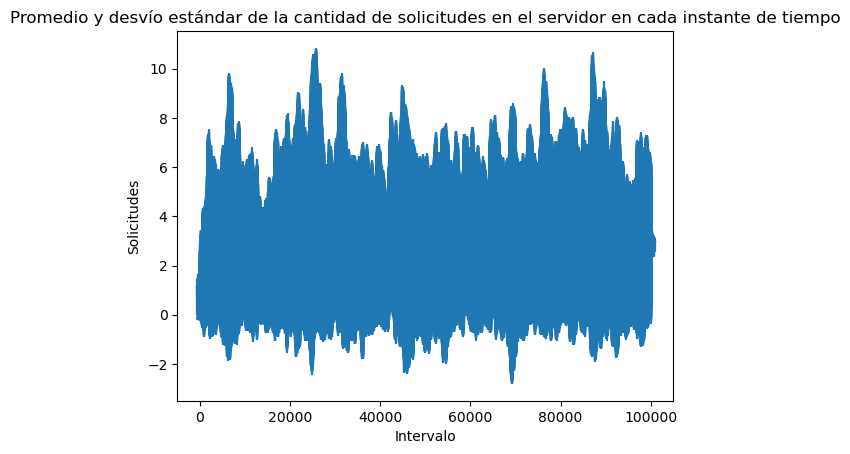

In [26]:
# Define la cantidad de intervalos para el gráfico
x = np.arange(start=0, stop=STEPS, step=1)

# Construye un gráfico de líneas con barras de error que permite visualizar en cada intervalo
# de tiempo el promedio de solicitudes en el servidor y el desvío estándar
plt.errorbar(x, mean, std, linestyle='None', marker='^')
plt.xlabel('Intervalo')
plt.ylabel('Solicitudes')
plt.title('Promedio y desvío estándar de la cantidad de solicitudes en el servidor en cada instante de tiempo')
plt.show()


**d) Realice un histograma mostrando cuantas veces el sistema estuvo en cada estado.**

La frecuencia relativa de cada estado del sistema es: 

    F. Relativa
0      0.249687
1      0.193906
2      0.144538
3      0.107175
4      0.078302
5      0.056196
6      0.041396
7      0.030846
8      0.023667
9      0.018890
10     0.014640
11     0.011086
12     0.007546
13     0.005641
14     0.004242
15     0.003075
16     0.002364
17     0.001631
18     0.001231
19     0.000985
20     0.000646
21     0.000544
22     0.000426
23     0.000412
24     0.000262
25     0.000166
26     0.000122
27     0.000098
28     0.000087
29     0.000072
30     0.000064
31     0.000043
32     0.000012
33     0.000002

Esto se puede observar gráficamente en el siguiente histograma


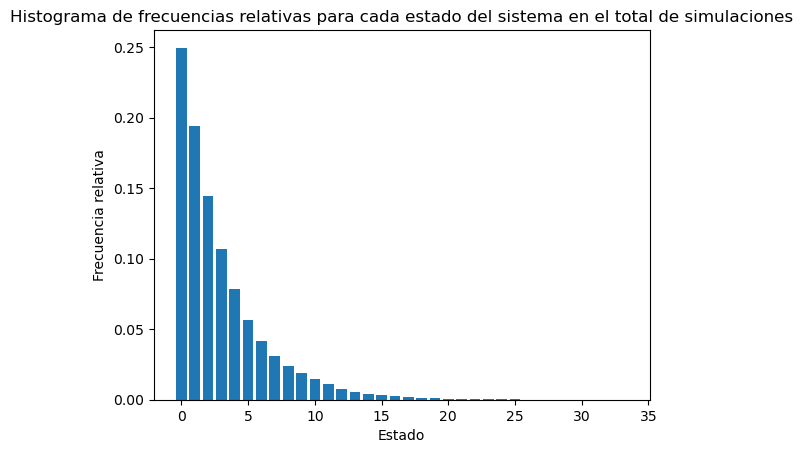

In [27]:
# Diccionario donde se guardará la frecuencia relativa de cada estado del sistema
final_state_count = {}

# Calcula la frecuencia relativa de cada estado en el total de simulaciones
for key in state_count:
    final_state_count[key] = (state_count[key] / (SIMULATIONS * STEPS))

print('La frecuencia relativa de cada estado del sistema es: \n')

# Construye un DataFrame con los valores de las frecuencias relativas para mostrarlos en una tabla
print(pd.DataFrame({'F. Relativa' : final_state_count.values() }))

print('\nEsto se puede observar gráficamente en el siguiente histograma')

# Construye un histograma con los valores de las frecuencias relativas
plt.bar(list(state_count.keys()), final_state_count.values())
plt.xlabel('Estado')
plt.ylabel('Frecuencia relativa')
plt.title('Histograma de frecuencias relativas para cada estado del sistema en el total de simulaciones')
plt.show()
